In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

train_data = pd.read_csv('merge.csv')
test_data = pd.read_csv('test.csv')
test_uuid = test_data['uuid']
train_data['ms'] = train_data['common_ts']
test_data['ms'] = test_data['common_ts']
# train_data['ms1'] = np.log2(train_data['ms'])
# test_data['ms1'] = np.log2(test_data['ms'])
# train_data['ms2'] = np.log10(train_data['ms'])
# test_data['ms2'] = np.log10(test_data['ms'])
train_data['common_ts'] = pd.to_datetime(train_data['common_ts'], unit='ms')
test_data['common_ts'] = pd.to_datetime(test_data['common_ts'], unit='ms')
# train_data['x7totarget'] = (train_data['x7'] == 1).astype(int)
# test_data['x7totarget'] = (test_data['x7'] == 1).astype(int)

c:\Users\asd\.conda\envs\py3810\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# def udmap_onethot(d):
#     v = np.zeros(9)
#     if d == 'unknown':
#         return v

#     d = eval(d)
#     for i in range(1, 10):
#         if 'key' + str(i) in d:
#             v[i-1] = d['key' + str(i)]

#     return v

# train_udmap_df = pd.DataFrame(np.vstack(train_data['udmap'].apply(udmap_onethot)))
# test_udmap_df = pd.DataFrame(np.vstack(test_data['udmap'].apply(udmap_onethot)))

# train_udmap_df.columns = ['key' + str(i) for i in range(1, 10)]
# test_udmap_df.columns = ['key' + str(i) for i in range(1, 10)]
# # test_data['udmap_isunknown'] = (test_data['udmap'] == 'unknown').astype(int)
# train_udmap_df = pd.concat([train_udmap_df, (train_data['udmap'] == 'unknown').astype(int)], axis=1)
# test_udmap_df = pd.concat([test_udmap_df, (test_data['udmap'] == 'unknown').astype(int)], axis=1)
# # 标准化数据
# scaler = StandardScaler()
# train_udmap_df = scaler.fit_transform(train_udmap_df)
# test_udmap_df = scaler.fit_transform(test_udmap_df)
# # 应用PCA
# pca = PCA(n_components=3)
# train_udmap_df = pca.fit_transform(train_udmap_df)
# test_udmap_df = pca.fit_transform(test_udmap_df)
# # 将PCA结果转为DataFrame并与原始DataFrame结合
# train_udmap_df = pd.DataFrame(data=train_udmap_df, columns=['keyPC' + str(i) for i in range(1, 4)])
# test_udmap_df = pd.DataFrame(data=test_udmap_df, columns=['keyPC' + str(i) for i in range(1, 4)])

In [3]:
from scipy.stats import mode, skew, entropy

# train_data = pd.concat([train_data, train_udmap_df], axis=1)
# test_data = pd.concat([test_data, test_udmap_df], axis=1)

# 计算均值和标准差
# train_data['key_mean'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].mean(axis=1)
# train_data['key_std'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].std(axis=1)
# test_data['key_mean'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].mean(axis=1)
# test_data['key_std'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].std(axis=1)

# train_data['key_median'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].median(axis=1)
# train_data['key_mode'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].apply(lambda row: mode(row)[0][0], axis=1)
# test_data['key_median'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].median(axis=1)
# test_data['key_mode'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].apply(lambda row: mode(row)[0][0], axis=1)
# train_data['key_Q1'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].quantile(0.25, axis=1)
# test_data['key_Q1'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].quantile(0.25, axis=1)
# train_data['key_Q3'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].quantile(0.75, axis=1)
# test_data['key_Q3'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].quantile(0.75, axis=1)
# train_data['key_skew'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].skew(axis=1)
# test_data['key_skew'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].skew(axis=1)
# train_data['key_entropy'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].apply(lambda row: entropy(row.value_counts(normalize=True)), axis=1)
# test_data['key_entropy'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].apply(lambda row: entropy(row.value_counts(normalize=True)), axis=1)

# train_data['key_max'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].max(axis=1)
# test_data['key_max'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].max(axis=1)
# train_data['key_min'] = train_udmap_df[['key' + str(i) for i in range(1, 10)]].min(axis=1)
# test_data['key_min'] = test_udmap_df[['key' + str(i) for i in range(1, 10)]].min(axis=1)
# train_data['key_range'] = train_data['key_max'] - train_data['key_min']
# test_data['key_range'] = test_data['key_max'] - test_data['key_min']
# # 变异系数 (使用标准差和均值)
# train_data['key_CV'] = train_data['key_std'] / train_data['key_mean']
# test_data['key_CV'] = test_data['key_std'] / test_data['key_mean']
x_list = ['x' + str(i) for i in range(1, 9)]
x_list.remove('x3')
# x_list.remove('x2')
# x_list.remove('x6')
# x_list.remove('x8')
train_data['x_mean'] = train_data[x_list].mean(axis=1)
train_data['x_std'] = train_data[x_list].std(axis=1)
test_data['x_mean'] = test_data[x_list].mean(axis=1)
test_data['x_std'] = test_data[x_list].std(axis=1)

# train_data['x_median'] = train_data[['x' + str(i) for i in range(1, 9)]].median(axis=1)
# train_data['x_mode'] = train_data[['x' + str(i) for i in range(1, 9)]].apply(lambda row: mode(row)[0][0], axis=1)
# test_data['x_median'] = test_data[['x' + str(i) for i in range(1, 9)]].median(axis=1)
# test_data['x_mode'] = test_data[['x' + str(i) for i in range(1, 9)]].apply(lambda row: mode(row)[0][0], axis=1)
train_data['x_Q1'] = train_data[x_list].quantile(0.25, axis=1)
test_data['x_Q1'] = test_data[x_list].quantile(0.25, axis=1)
train_data['x_Q3'] = train_data[x_list].quantile(0.75, axis=1)
test_data['x_Q3'] = test_data[x_list].quantile(0.75, axis=1)
train_data['x_skew'] = train_data[x_list].skew(axis=1)
test_data['x_skew'] = test_data[x_list].skew(axis=1)
# train_data['x_entropy'] = train_data[['x' + str(i) for i in range(1, 9)]].apply(lambda row: entropy(row.value_counts(normalize=True)), axis=1)
# test_data['x_entropy'] = test_data[['x' + str(i) for i in range(1, 9)]].apply(lambda row: entropy(row.value_counts(normalize=True)), axis=1)
# train_data['x_max'] = train_data[['x' + str(i) for i in range(1, 9)]].max(axis=1)
# test_data['x_max'] = test_data[['x' + str(i) for i in range(1, 9)]].max(axis=1)
# train_data['x_min'] = train_data[['x' + str(i) for i in range(1, 9)]].min(axis=1)
# test_data['x_min'] = test_data[['x' + str(i) for i in range(1, 9)]].min(axis=1)
# train_data['x_range'] = train_data['x_max'] - train_data['x_min']
# test_data['x_range'] = test_data['x_max'] - test_data['x_min']
# 变异系数 (使用标准差和均值)
train_data['x_CV'] = train_data['x_std'] / train_data['x_mean']
test_data['x_CV'] = test_data['x_std'] / test_data['x_mean']
# train_data = train_data.drop(['x' + str(i) for i in range(6, 9)], axis=1)
# test_data = test_data.drop(['x' + str(i) for i in range(6, 9)], axis=1)
# train_data = train_data.drop(['key6', 'key7', 'key8', 'key9'], axis=1)
# test_data = test_data.drop(['key6', 'key7', 'key8', 'key9'], axis=1)
# 初始化归一化器
# scaler = MinMaxScaler()
# 对这些列进行归一化
# train_data[x_list] = scaler.fit_transform(train_data[x_list])
# test_data[x_list] = scaler.fit_transform(test_data[x_list])


In [4]:
# # 标准化数据
# scaler = StandardScaler()
# train_x = scaler.fit_transform(train_data[['x' + str(i) for i in range(1, 6)]])
# test_x = scaler.fit_transform(test_data[['x' + str(i) for i in range(1, 6)]])
# # 应用PCA
# n_components = 1
# pca = PCA(n_components=n_components)
# train_x = pca.fit_transform(train_x)
# test_x = pca.fit_transform(test_x)
# # 将PCA结果转为DataFrame并与原始DataFrame结合
# train_x = pd.DataFrame(data=train_x, columns=['xPC' + str(i) for i in range(1, n_components+1)])
# test_x = pd.DataFrame(data=test_x, columns=['xPC' + str(i) for i in range(1, n_components+1)])
# # train_data = train_data.drop(['x' + str(i) for i in range(1, 9)], axis=1)
# # test_data = test_data.drop(['x' + str(i) for i in range(1, 9)], axis=1)
# train_data = pd.concat([train_data, train_x], axis=1)
# test_data = pd.concat([test_data, test_x], axis=1)

In [5]:
# train_data['eid_freq'] = train_data['eid'].map(train_data['eid'].value_counts())
# test_data['eid_freq'] = test_data['eid'].map(train_data['eid'].value_counts())

train_data['eid_mean'] = train_data['eid'].map(train_data.groupby('eid')['target'].mean())
test_data['eid_mean'] = test_data['eid'].map(train_data.groupby('eid')['target'].mean())
# train_data['eid_std'] = train_data['eid'].map(train_data.groupby('eid')['target'].std())
# test_data['eid_std'] = test_data['eid'].map(train_data.groupby('eid')['target'].std())
# train_data['eid_skew'] = train_data['eid'].map(train_data.groupby('eid')['target'].skew())
# test_data['eid_skew'] = test_data['eid'].map(train_data.groupby('eid')['target'].skew())
# train_data['eid_Q1'] = train_data['eid'].map(train_data.groupby('eid')['target'].quantile(0.25))
# test_data['eid_Q1'] = test_data['eid'].map(train_data.groupby('eid')['target'].quantile(0.25))
# train_data['eid_Q3'] = train_data['eid'].map(train_data.groupby('eid')['target'].quantile(0.75))
# test_data['eid_Q3'] = test_data['eid'].map(train_data.groupby('eid')['target'].quantile(0.75))
# train_data['eid_entropy'] = train_data['eid'].map(train_data.groupby('eid')['target'].apply(lambda row: entropy(row.value_counts(normalize=True))))
# test_data['eid_entropy'] = test_data['eid'].map(train_data.groupby('eid')['target'].apply(lambda row: entropy(row.value_counts(normalize=True))))
train_data = train_data.drop('eid', axis=1)
test_data = test_data.drop('eid', axis=1)

In [6]:
train_data['common_ts_weekday'] = train_data['common_ts'].dt.weekday
# for i in range(6):
#     train_data[f'common_isday{i+1}'] = (train_data['common_ts'].dt.weekday == i).astype(int)
# train_data['common_isMonday'] = (train_data['common_ts'].dt.weekday == 0).astype(int)
# train_data['common_isThursday'] = (train_data['common_ts'].dt.weekday == 3).astype(int)
train_data['common_ts_day'] = train_data['common_ts'].dt.day
train_data['common_ts_hour'] = train_data['common_ts'].dt.hour
# train_data['common_ts_minute'] = train_data['common_ts'].dt.minute
# train_data['common_ts_second'] = train_data['common_ts'].dt.second
test_data['common_ts_weekday'] = test_data['common_ts'].dt.weekday
# for i in range(6):
#     test_data[f'common_isday{i+1}'] = (test_data['common_ts'].dt.weekday == i).astype(int)
# test_data['common_isMonday'] = (test_data['common_ts'].dt.weekday == 0).astype(int)
# test_data['common_isThursday'] = (test_data['common_ts'].dt.weekday == 3).astype(int)
test_data['common_ts_day'] = test_data['common_ts'].dt.day
test_data['common_ts_hour'] = test_data['common_ts'].dt.hour
# test_data['common_ts_minute'] = test_data['common_ts'].dt.minute
# test_data['common_ts_second'] = test_data['common_ts'].dt.second
train_data = train_data.drop(['udmap', 'common_ts', 'uuid', 'x3'], axis=1)
test_data = test_data.drop(['udmap', 'common_ts', 'uuid', 'x3'], axis=1)
# 对这些列进行归一化
# train_data[train_data.columns] = scaler.fit_transform(train_data[train_data.columns])
# test_data[test_data.columns] = scaler.fit_transform(test_data[test_data.columns])
# train_data.fillna(0, inplace=True)
# test_data.fillna(0, inplace=True)
# 将特征列赋值给X，将目标列赋值给y
X = train_data.drop(['target'], axis=1)
y = train_data['target']
# # 划分训练集和测试集
# X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# X_train, y_train = X, y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train, y_train = X, y
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
# smote = SMOTE(random_state=42, n_jobs=-1)
# from imblearn.over_sampling import BorderlineSMOTE
# borderline_smote = BorderlineSMOTE(kind='borderline-1', random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
# X_train, y_train = smote.fit_resample(X, y)
# X_train, y_train = borderline_smote.fit_resample(X_train, y_train)

In [7]:
# from tabnanny import verbose
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# import xgboost as xgb
# from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [20, 40, 60],
#     'max_depth': [5, 10, 15],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'subsample': [0.7, 0.8, 0.9],
# }
# import joblib
# clf = joblib.load('decision_tree_model.pkl')
# clf = DecisionTreeClassifier(criterion="log_loss", max_depth=12)

# base_learners = [
#     ('knn', KNeighborsClassifier(n_neighbors=2, n_jobs=-1)),
#     ("rf", RandomForestClassifier(criterion="entropy", n_jobs=-1, verbose=1, n_estimators=100)),
#     ("svm", SVC(kernel='rbf', C=1)),
#     ('dt', DecisionTreeClassifier(criterion="entropy")),
# ]
# import joblib
# clf = joblib.load('dt_model.pkl')
# 定义模型
# clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, verbose=1, criterion="entropy", random_state=42, warm_start=True)
# clf = GradientBoostingClassifier(n_estimators=1000, random_state=42, verbose=1, learning_rate=0.6)

# clf = VotingClassifier(
#     estimators=[('rf', rf_clf), ('old', old_clf)],
#     voting='soft',  # 使用soft投票，这意味着预测的类概率会被平均
#     verbose=True,
# )

# meta_learner = LogisticRegression(verbose=1)
# clf = VotingClassifier(estimators=base_learners, voting='soft', weights=[0.1, 0.5, 0.3, 0.1], verbose=True)
# clf = StackingClassifier(estimators=base_learners, verbose=1, n_jobs=-1, final_estimator=meta_learner, passthrough=True)
# clf = XGBClassifier(
#     objective='binary:logistic',  # 对于二分类问题
#     n_estimators=2000,  # 使用100棵树
#     learning_rate=0.3,
#     max_depth=12,
#     reg_alpha=0.1,
#     reg_lambda=0.1,
#     min_child_weight=3,
# )
# clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=30, estimator=clf)
# clf = SVC(kernel='rbf', C=1)
# clf = RandomForestClassifier(criterion="log_loss", n_jobs=-1, verbose=1, n_estimators=200)
# clf = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
# clf = BalancedRandomForestClassifier(n_jobs=-1, verbose=1, n_estimators=1000)
# clf = ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, verbose=1, bootstrap=True)
# best_params = {
#     'n_estimators': 300, 
#     'max_depth': 21,
#     'min_samples_split': 3,
#     'min_samples_leaf': 5, 
#     'max_features': 'log2',
#     'bootstrap': False,
#     'criterion': 'entropy'
#     # 其他参数取默认值
# }
# clf = RandomForestClassifier(**best_params, n_jobs=-1)
# clf = RandomForestClassifier(n_jobs=-1)
clf = RandomForestClassifier(   
        n_estimators=131,
        max_depth=33,
        n_jobs=4,
        max_features=9,
        min_samples_leaf=1,
        min_samples_split=2,
        criterion = 'entropy'
)
clf = AdaBoostClassifier(learning_rate=0.3, n_estimators=5, estimator=clf)
clf.fit(
    train_data.drop(['target'], axis=1),
    train_data['target'],

)
# import lime
# import lime.lime_tabular
# # 创建LIME解释器
# explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train), training_labels=np.array(y_train), class_names=[0,1], discretize_continuous=True, feature_names=X_train.columns)

# # 解释一个实例
# i = np.random.randint(0, X_val.shape[0])
# exp = explainer.explain_instance(np.array(X_val)[i], clf.predict_proba, num_features=len(X_train.columns))
# exp.show_in_notebook(show_table=True, show_all=False)
# def adjust_learning_rate(env):
#     # 获取训练损失值
#     current_loss = env.evaluation_result_list[-1][1]
#     if current_loss > threshold_high:
#         env.model.set_param('eta', higher_learning_rate)
#     elif current_loss < threshold_low1:
#         env.model.set_param('eta', lower_learning_rate1)
#     else:
#         env.model.set_param('eta', lower_learning_rate2)
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dval = xgb.DMatrix(X_val, label=y_val)
# params = {
#     'learning_rate': 0.01,
#     'max_depth': 12,
#     'min_child_weight': 1,
#     'gamma': 0.1,

#     'objective': 'binary:logistic',
#     'scale_pos_weight': 6.11,
#     'nthread': -1,
#     'booster': 'gbtree',
#     'verbosity': 1,
#     'n_estimators': 200
# }
# clf = xgb.Booster()
# clf.load_model('0001.model')

# # 设置损失阈值和学习率
# threshold_high = 0.3
# threshold_low1 = 0.2
# higher_learning_rate = 0.5
# lower_learning_rate1 = 0.3
# lower_learning_rate2 = 0.2
# clf = xgb.train(params, dtrain, num_boost_round=400, early_stopping_rounds=10, evals=[(dval, 'val')], verbose_eval=True, xgb_model=clf)
# clf = xgb.train(params, dtrain, num_boost_round=100, early_stopping_rounds=30, evals=[(dval, 'val')], verbose_eval=True)
# xgb.plot_importance(clf)features = X_train.columns

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=33,
                                                    max_features=9,
                                                    n_estimators=131,
                                                    n_jobs=4),
                   learning_rate=0.3, n_estimators=5)

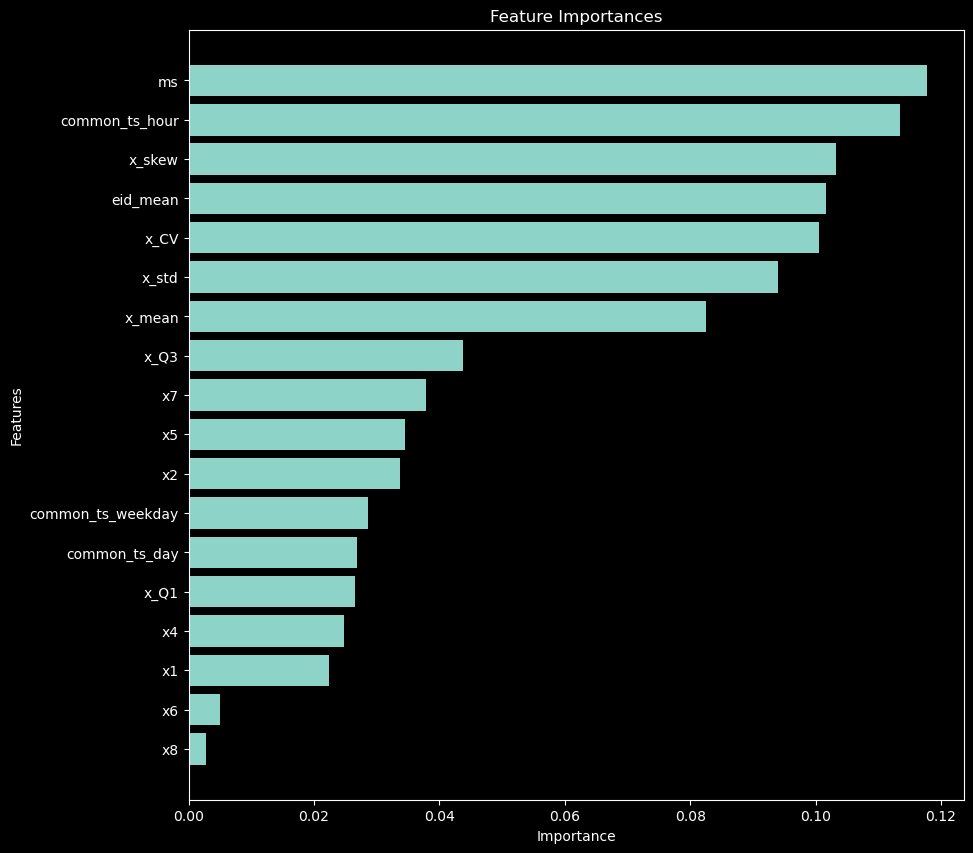

In [8]:
features = X_train.columns
importances = clf.feature_importances_
# 对重要性进行排序并获取索引
indices = np.argsort(importances)

# 绘制特征重要性
plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(np.array(features)[indices], importances[indices], align="center")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [9]:
# import lightgbm as lgb

# # 创建数据集
# train_data = lgb.Dataset(X_train, label=y_train)
# val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# # 设置参数
# params = {
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'boosting_type': 'gbdt',
#     'num_threads': -1,
#     'force_row_wise': True,
#     'learning_rate': 0.001,

# }

# # 训练模型
# num_round = 200000
# clf = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[val_data], early_stopping_rounds=30)


In [10]:
# pd.DataFrame({
#     'uuid': test_uuid,
#     'target': clf.predict(test_data)
# }).to_csv('result.csv', index=None)
# dtest = xgb.DMatrix(test_data)
# y_pred = clf.predict(dtest)
y_pred = clf.predict(test_data)
pd.DataFrame({
    'uuid': test_uuid,
    'target': [1 if pred > 0.5 else 0 for pred in y_pred]
}).to_csv('result.csv', index=None)

In [11]:
import joblib

# # 保存模型
# # 保存模型到文件
joblib.dump(clf, 'adaboost_model.pkl')
# clf.save_model('lgb_model.txt')
# clf.save_model('0001.model')

['adaboost_model.pkl']

In [12]:
# import joblib

# clf = joblib.load('new_model.pkl')
# clf = xgb.Booster()
# clf.load_model('xgboost_model.model')
# conf_thres = 0.5
# 在测试集上进行预测
# y_pred = clf.predict(dval)
y_pred = clf.predict(X_val)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
# 计算准确率
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# 计算F1分数
f1 = f1_score(y_val, y_pred)
print("F1 score:", f1)

Accuracy: 0.9477603820346975
F1 score: 0.7963041531136568
